In [5]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy
# Import the requests library.
import requests
# Import the API key.
from config import weather_api_key
# Import the time library and the datetime module from the datetime library
import time
from datetime import datetime


In [6]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=0bad4ffb57d85b86ec0771aab98c7d20


In [7]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

In [8]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [9]:
# Create a list for holding the cities.
cities = []

In [10]:
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

619

In [15]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1


# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | hami
Processing Record 2 of Set 1 | laredo
Processing Record 3 of Set 1 | samarai
Processing Record 4 of Set 1 | bredasdorp
Processing Record 5 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 6 of Set 1 | mahebourg
Processing Record 7 of Set 1 | fevralsk
City not found. Skipping...
Processing Record 8 of Set 1 | palauig
Processing Record 9 of Set 1 | natal
Processing Record 10 of Set 1 | adrar
Processing Record 11 of Set 1 | albany
Processing Record 12 of Set 1 | ushuaia
Processing Record 13 of Set 1 | asyut
Processing Record 14 of Set 1 | arraial do cabo
Processing Record 15 of Set 1 | bambous virieux
Processing Record 16 of Set 1 | hermanus
Processing Record 17 of Set 1 | amderma
City not found. Skipping...
Processing Record 18 of Set 1 | port alfred
Processing Record 19 of Set 1 | bluff
Processing Record 20 of Set 1 | hobart
Processing Record 21 of Set 1 | yerbogachen
Proces

Processing Record 40 of Set 4 | lagoa
Processing Record 41 of Set 4 | sale
Processing Record 42 of Set 4 | bernay
Processing Record 43 of Set 4 | lompoc
Processing Record 44 of Set 4 | fairbanks
Processing Record 45 of Set 4 | puerto maldonado
Processing Record 46 of Set 4 | rincon
Processing Record 47 of Set 4 | chokurdakh
Processing Record 48 of Set 4 | palabuhanratu
City not found. Skipping...
Processing Record 49 of Set 4 | nemuro
Processing Record 50 of Set 4 | vestmanna
Processing Record 1 of Set 5 | dingle
Processing Record 2 of Set 5 | malinyi
Processing Record 3 of Set 5 | grand river south east
City not found. Skipping...
Processing Record 4 of Set 5 | bandar-e lengeh
Processing Record 5 of Set 5 | san patricio
Processing Record 6 of Set 5 | trelew
Processing Record 7 of Set 5 | bermeo
Processing Record 8 of Set 5 | mocambique
City not found. Skipping...
Processing Record 9 of Set 5 | andenes
Processing Record 10 of Set 5 | sept-iles
Processing Record 11 of Set 5 | arzgir
Pro

Processing Record 29 of Set 8 | kresttsy
Processing Record 30 of Set 8 | pasighat
Processing Record 31 of Set 8 | karaton
Processing Record 32 of Set 8 | lisakovsk
Processing Record 33 of Set 8 | formoso do araguaia
City not found. Skipping...
Processing Record 34 of Set 8 | atar
Processing Record 35 of Set 8 | taoudenni
Processing Record 36 of Set 8 | faanui
Processing Record 37 of Set 8 | coos bay
Processing Record 38 of Set 8 | coquimbo
Processing Record 39 of Set 8 | tiksi
Processing Record 40 of Set 8 | luanda
Processing Record 41 of Set 8 | vila
Processing Record 42 of Set 8 | san rafael
Processing Record 43 of Set 8 | anadyr
Processing Record 44 of Set 8 | ambilobe
Processing Record 45 of Set 8 | ponta delgada
Processing Record 46 of Set 8 | codrington
Processing Record 47 of Set 8 | bara
Processing Record 48 of Set 8 | vestmannaeyjar
Processing Record 49 of Set 8 | mount isa
Processing Record 50 of Set 8 | xichang
Processing Record 1 of Set 9 | eyrarbakki
Processing Record 2 of

Processing Record 15 of Set 12 | adre
Processing Record 16 of Set 12 | galgani
City not found. Skipping...
Processing Record 17 of Set 12 | peace river
Processing Record 18 of Set 12 | derzhavinsk
Processing Record 19 of Set 12 | vityazevo
Processing Record 20 of Set 12 | sinnamary
Processing Record 21 of Set 12 | nachod
Processing Record 22 of Set 12 | kiboga
Processing Record 23 of Set 12 | guanare
Processing Record 24 of Set 12 | gulariya
Processing Record 25 of Set 12 | hambantota
Processing Record 26 of Set 12 | douglas
Processing Record 27 of Set 12 | sirjan
Processing Record 28 of Set 12 | acapulco
Processing Record 29 of Set 12 | nosy varika
Processing Record 30 of Set 12 | zeya
Processing Record 31 of Set 12 | sola
Processing Record 32 of Set 12 | portomaggiore
Processing Record 33 of Set 12 | dicabisagan
Processing Record 34 of Set 12 | ucluelet
Processing Record 35 of Set 12 | marblehead
Processing Record 36 of Set 12 | umm ruwabah
City not found. Skipping...
Processing Reco

In [16]:
len(city_data)

558

In [12]:
city_data_to_load = "Weather_Data/cities.csv"

# Read the city data file and store it in a pandas DataFrame.
city_data_df = pd.read_csv(city_data_to_load)
city_data_df.head(10)

,City_ID,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,0,Hami,CN,2022-11-25 22:03:50,42.8000,93.4500,34.05,40,100,7.81
1,1,Laredo,US,2022-11-25 21:59:52,27.5064,-99.5075,55.69,100,100,11.50
2,2,Samarai,PG,2022-11-25 22:03:50,-10.6167,150.6667,82.94,76,87,4.07
3,3,Bredasdorp,ZA,2022-11-25 22:03:51,-34.5322,20.0403,58.71,63,57,1.86
4,4,Mahebourg,MU,2022-11-25 22:03:51,-20.4081,57.7000,75.49,78,40,5.75
5,5,Palauig,PH,2022-11-25 22:03:52,15.4350,119.9045,78.57,59,91,5.21
6,6,Natal,BR,2022-11-25 22:03:52,-5.7950,-35.2094,81.25,78,40,9.22
7,7,Adrar,MR,2022-11-25 22:03:52,20.5022,-10.0711,73.90,12,100,9.80
8,8,Albany,US,2022-11-25 22:00:56,42.6001,-73.9662,44.38,70,86,3.00
9,9,Ushuaia,AR,2022-11-25 22:01:50,-54.8000,-68.3000,44.06,64,29,9.93


In [11]:
# Convert the array of dictionaries to a Pandas DataFrame.
# city_data_df = pd.DataFrame(city_data)
# city_data_df.head(10)

NameError: name 'city_data' is not defined

In [27]:
# city_data_df = city_data_df[["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness",
                                 "Wind Speed"]]
# city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Hami,CN,2022-11-25 22:03:50,42.8000,93.4500,34.05,40,100,7.81
1,Laredo,US,2022-11-25 21:59:52,27.5064,-99.5075,55.69,100,100,11.50
2,Samarai,PG,2022-11-25 22:03:50,-10.6167,150.6667,82.94,76,87,4.07
3,Bredasdorp,ZA,2022-11-25 22:03:51,-34.5322,20.0403,58.71,63,57,1.86
4,Mahebourg,MU,2022-11-25 22:03:51,-20.4081,57.7000,75.49,78,40,5.75
5,Palauig,PH,2022-11-25 22:03:52,15.4350,119.9045,78.57,59,91,5.21
6,Natal,BR,2022-11-25 22:03:52,-5.7950,-35.2094,81.25,78,40,9.22
7,Adrar,MR,2022-11-25 22:03:52,20.5022,-10.0711,73.90,12,100,9.80
8,Albany,US,2022-11-25 22:00:56,42.6001,-73.9662,44.38,70,86,3.00
9,Ushuaia,AR,2022-11-25 22:01:50,-54.8000,-68.3000,44.06,64,29,9.93


In [28]:
# Create the output file (CSV).
# output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
# city_data_df.to_csv(output_data_file, index_label="City_ID")

In [13]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [15]:
# Import the time module.
import time
# Get today's date in seconds.
today = time.strftime("%x")
today

'11/26/22'

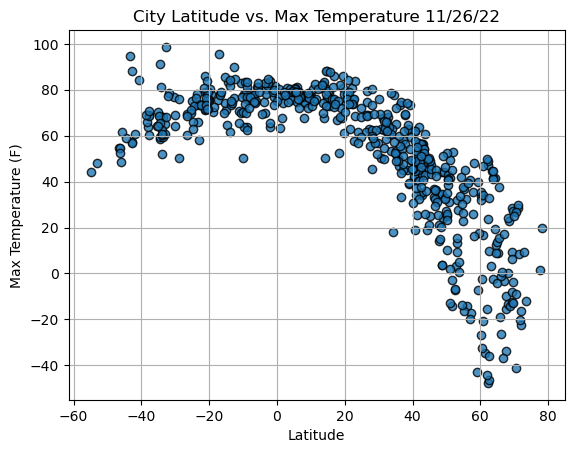

In [16]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ today)
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

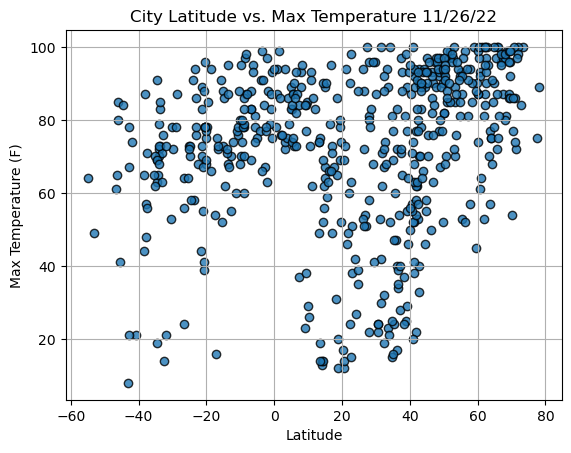

In [17]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ today)
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

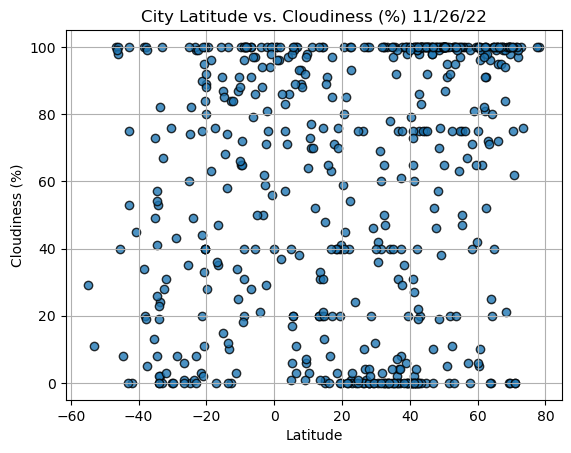

In [18]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

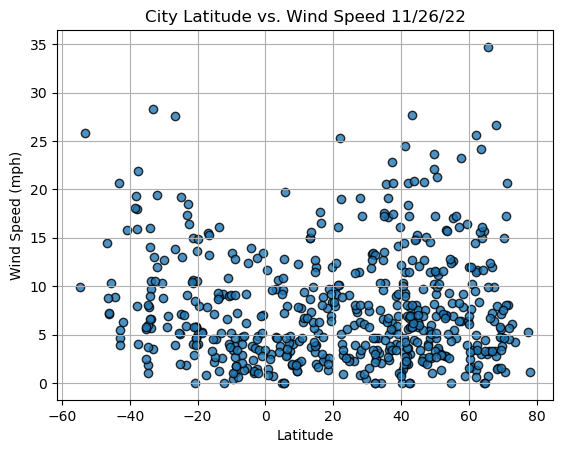

In [19]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [20]:
# Import linear regression from the SciPy stats module.
from scipy.stats import linregress

In [21]:
# Create an equal number of latitudes and temperatures.
lats = [42.5, 43.9, 8.1, 36.8, 79.9, 69.1, 25.7, 15.3, 12.7, 64.5]
temps = [80.5, 75.3, 90.9, 90.0, 40.4, 62.3, 85.4, 79.6, 72.5, 72.0]

In [25]:
# Perform linear regression.
(slope, intercept, r_value, p_value, std_err) = linregress(lats, temps)
linregress(lats, temps)

LinregressResult(slope=-0.452929121241496, intercept=92.93922548147363, rvalue=-0.7590444753769936, pvalue=0.01089687086168761, stderr=0.13734880392044935, intercept_stderr=6.372784691788096)

In [23]:
# Get the equation of the line.
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(line_eq)
print(f"The p-value is: {p_value:.3f}")

y = -0.45x + 92.94
The p-value is: 0.011


In [26]:
# Calculate the regression line "y values" from the slope and intercept.
regress_values = [(lat * slope + intercept) for lat in lats]

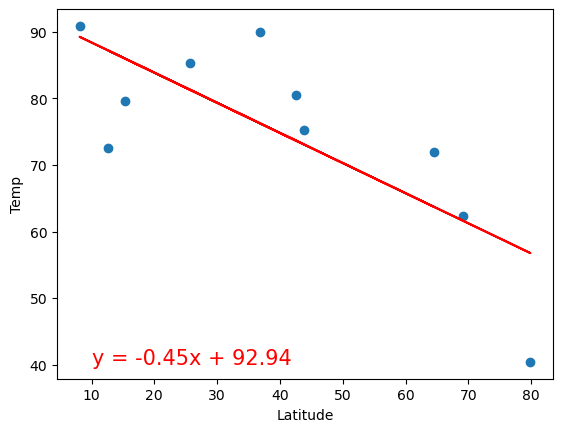

In [27]:
# Import Matplotlib.
import matplotlib.pyplot as plt
# Create a scatter plot of the x and y values.
plt.scatter(lats,temps)
# Plot the regression line with the x-values and the y coordinates based on the intercept and slope.
plt.plot(lats,regress_values,"r")
# Annotate the text for the line equation and add its coordinates.
plt.annotate(line_eq, (10,40), fontsize=15, color="red")
plt.xlabel('Latitude')
plt.ylabel('Temp')
plt.show()

In [35]:
# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [36]:
# Return all cities in the northern hemisphere
city_data_df.loc[(city_data_df["Lat"] >= 0)].head(5)

,City_ID,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,0,Hami,CN,2022-11-25 22:03:50,42.8000,93.4500,34.05,40,100,7.81
1,1,Laredo,US,2022-11-25 21:59:52,27.5064,-99.5075,55.69,100,100,11.50
5,5,Palauig,PH,2022-11-25 22:03:52,15.4350,119.9045,78.57,59,91,5.21
7,7,Adrar,MR,2022-11-25 22:03:52,20.5022,-10.0711,73.90,12,100,9.80
8,8,Albany,US,2022-11-25 22:00:56,42.6001,-73.9662,44.38,70,86,3.00


In [37]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

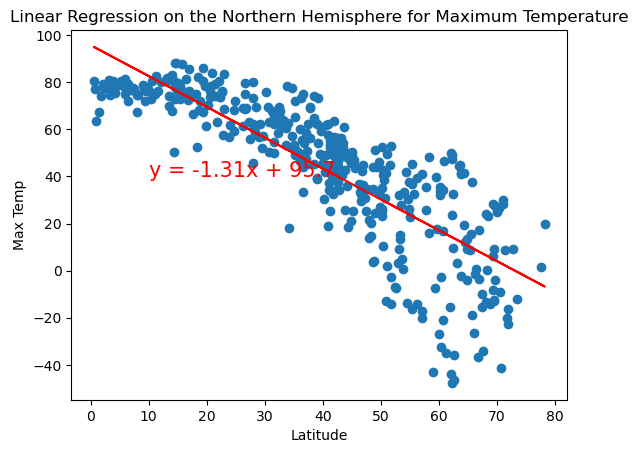

In [40]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for Maximum Temperature', 'Max Temp',(10,40))


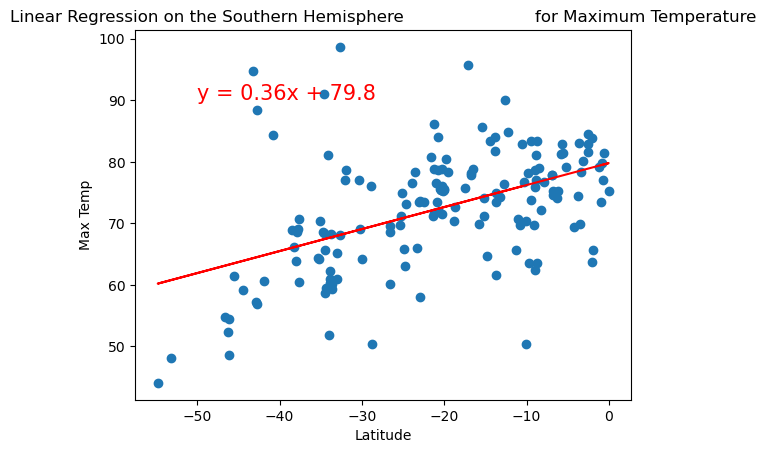

In [43]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))

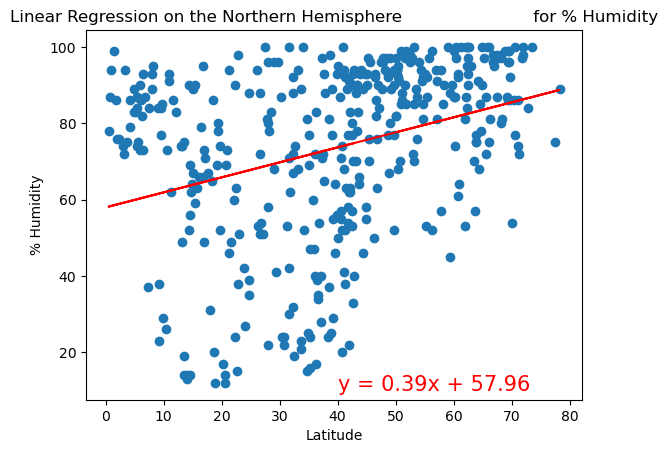

In [44]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

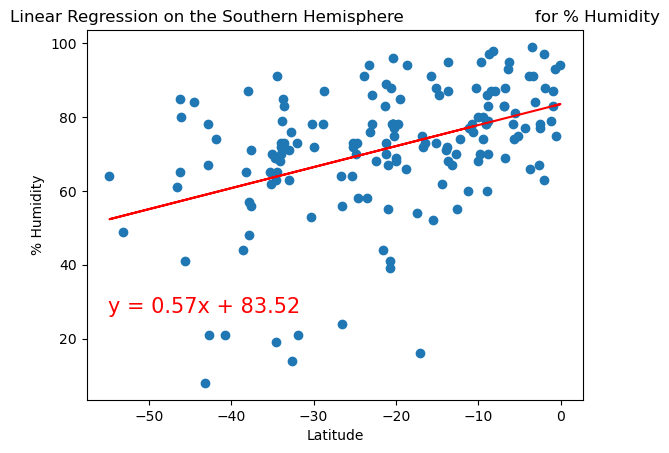

In [56]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-55,27))

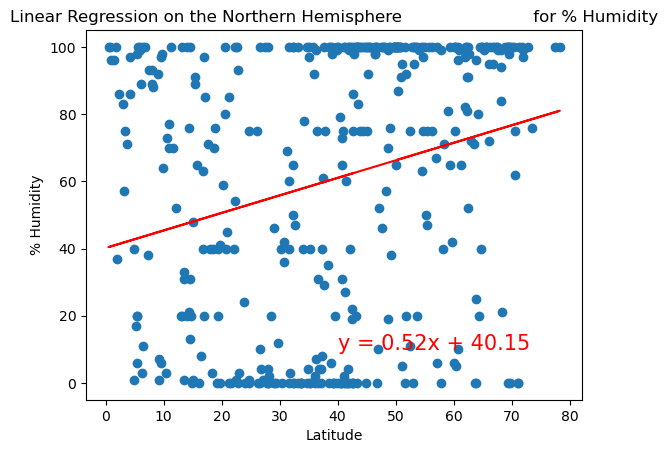

In [46]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Cloudiness (%)', 'Cloudiness (%)',(40,10))

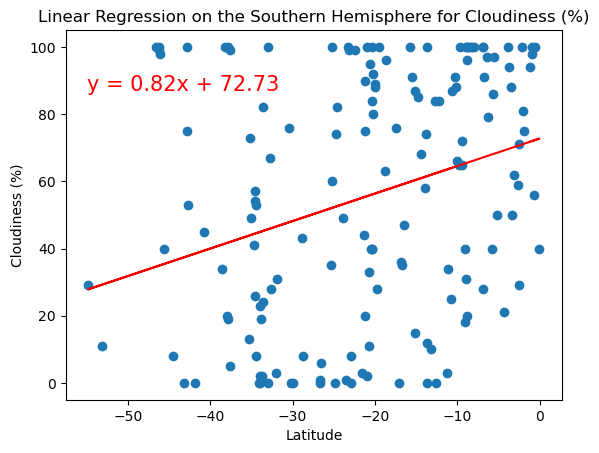

In [55]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for Cloudiness (%)', 'Cloudiness (%)',(-55,87))

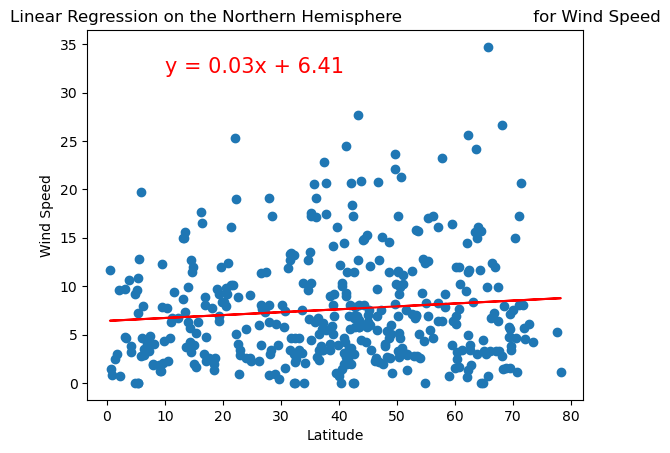

In [52]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(10,32))

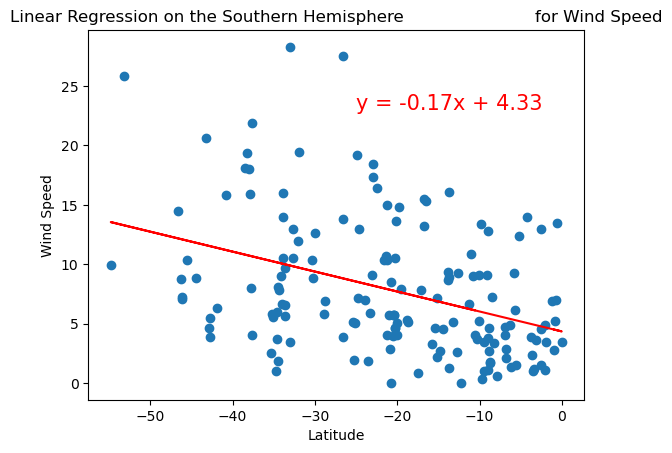

In [58]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-25,23))